KFTT http://www.phontron.com/kftt/index-ja.html#data

# 90 データの準備
#### 機械翻訳のデータセットをダウンロードせよ．訓練データ，開発データ，評価データを整形し，必要に応じてトークン化などの前処理を行うこと．ただし，この段階ではトークンの単位として形態素（日本語）および単語（英語）を採用せよ．

In [3]:
!wget http://www.phontron.com/kftt/download/kftt-data-1.0.tar.gz

--2022-02-14 01:17:20--  http://www.phontron.com/kftt/download/kftt-data-1.0.tar.gz
Resolving www.phontron.com (www.phontron.com)... 208.113.196.149
Connecting to www.phontron.com (www.phontron.com)|208.113.196.149|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99246893 (95M) [application/gzip]
Saving to: ‘kftt-data-1.0.tar.gz’

kftt-data-1.0.tar.g 100%[===================>]  94.65M  16.6MB/s    in 6.8s    

2022-02-14 01:17:28 (13.8 MB/s) - ‘kftt-data-1.0.tar.gz’ saved [99246893/99246893]



In [4]:
!tar zxvf kftt-data-1.0.tar.gz

kftt-data-1.0/
kftt-data-1.0/data/
kftt-data-1.0/data/orig/
kftt-data-1.0/data/orig/kyoto-tune.en
kftt-data-1.0/data/orig/kyoto-dev.ja
kftt-data-1.0/data/orig/kyoto-dev.en
kftt-data-1.0/data/orig/kyoto-train.en
kftt-data-1.0/data/orig/kyoto-tune.ja
kftt-data-1.0/data/orig/kyoto-train.ja
kftt-data-1.0/data/orig/kyoto-test.ja
kftt-data-1.0/data/orig/kyoto-test.en
kftt-data-1.0/data/tok/
kftt-data-1.0/data/tok/kyoto-tune.en
kftt-data-1.0/data/tok/kyoto-dev.ja
kftt-data-1.0/data/tok/kyoto-train.cln.en
kftt-data-1.0/data/tok/kyoto-dev.en
kftt-data-1.0/data/tok/kyoto-train.en
kftt-data-1.0/data/tok/kyoto-tune.ja
kftt-data-1.0/data/tok/kyoto-train.cln.ja
kftt-data-1.0/data/tok/kyoto-train.ja
kftt-data-1.0/data/tok/kyoto-test.ja
kftt-data-1.0/data/tok/kyoto-test.en
kftt-data-1.0/README.txt


#### ginzaについて https://megagonlabs.github.io/ginza/

In [1]:
!pip install -U ginza

distutils: /opt/conda/include/python3.8/UNKNOWN
sysconfig: /opt/conda/include/python3.8
user = False
home = None
root = None
prefix = None
     |████████████████████████████████| 6.2 MB 8.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 55.8 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 3.8 MB/s  eta 0:00:01
     |████████████████████████████████| 181 kB 68.6 MB/s eta 0:00:01
     |████████████████████████████████| 9.9 MB 66.1 MB/s eta 0:00:01
     |████████████████████████████████| 636 kB 78.3 MB/s eta 0:00:01
     |████████████████████████████████| 13.7 MB 80.4 MB/s eta 0:00:01
     |████████████████████████████████| 454 kB 79.6 MB/s eta 0:00:01
     |████████████████████████████████| 130 kB 68.4 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 19.2 MB/s eta 0:00:01
  Created wheel for ginza: filename=ginza-5.1.0-py3-none-any.whl size=20090 sha256=f83fcf918ed58d14031b13507a3a9a5de5f8ecf4dd5631fa143f96d18ee11c8b
  Stored in directory: /h

In [55]:
!cat kftt-data-1.0/data/orig/kyoto-train.ja | sed 's/\s+/ /g' | ginzame > train.ginza.ja
!cat kftt-data-1.0/data/orig/kyoto-dev.ja | sed 's/\s+/ /g' | ginzame > dev.ginza.ja
!cat kftt-data-1.0/data/orig/kyoto-test.ja | sed 's/\s+/ /g' | ginzame > test.ginza.ja

In [5]:
for src, dst in [
    ('train.ginza.ja', 'train.ja'),
    ('dev.ginza.ja', 'dev.ja'),
    ('test.ginza.ja', 'test.ja'),
]:
    with open(src) as f:
        lst = []
        tmp = []
        for x in f:
            x = x.strip()
            if x == 'EOS':
                lst.append(' '.join(tmp))
                tmp = []
            elif x != '':
                tmp.append(x.split('\t')[0])
    with open(dst, 'w') as f:
        for line in lst:
            print(line, file=f)

In [33]:
!head train.ja

雪舟 （ せっ しゅう 、 1420 年 （ 応永 27 年 ） - 1506 年 （ 永正 3 年 ） ） は 号 で 、 15 世紀 後半 室町 時代 に 活躍 し た 水墨 画家 ・ 禅僧 で 、 画聖 と も 称え られる 。
日本 の 水墨 画 を 一変 さ せ た 。
諱 は 「 等楊（とうよう） 」 、 もしくは 「 拙 宗 （ せっ しゅう ） 」 と 号し た 。
備中 国 に 生まれ 、 京都 ・ 相国 寺 に 入っ て から 周防 国 に 移る 。
その 後 遣明 使 に 随行 し て 中国 （ 明 ） に 渡っ て 中国 の 水墨 画 を 学ん だ 。
作品 は 数多く 、 中国 風 の 山水 画 だけ で なく 人物 画 や 花鳥 画 も よく し た 。
大胆 な 構図 と 力強い 筆線 は 非常 に 個性 的 な 画風 を 作り 出し て いる 。
現存 する 作品 の うち 6 点 が 国宝 に 指定 さ れ て おり 、 日本 の 画家 の なか で も 別格 の 評価 を 受け て いる と いえる 。
この ため 、 花鳥 図 屏風 など に 「 伝 雪舟 筆 」 さ れる 作品 は 大変 多い 。
真筆 で ある か 専門 家 の 間 で も 意見 の 分かれる もの も 多々 ある 。


In [2]:
!python -m spacy download en_core_web_sm

2022-02-20 04:12:26.325377: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
distutils: /opt/conda/include/python3.8/UNKNOWN
sysconfig: /opt/conda/include/python3.8
user = False
home = None
root = None
prefix = None
     |████████████████████████████████| 13.9 MB 311 kB/s eta 0:00:01
distutils: /opt/conda/include/python3.8/UNKNOWN
sysconfig: /opt/conda/include/python3.8
user = False
home = None
root = None
prefix = None
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
import re
import spacy

nlp = spacy.load("en_core_web_sm")
for src, dst in [
    ('kftt-data-1.0/data/orig/kyoto-train.en', 'train.en'),
    ('kftt-data-1.0/data/orig/kyoto-dev.en', 'dev.en'),
    ('kftt-data-1.0/data/orig/kyoto-test.en', 'test.en'),
]:
    with open(src) as f, open(dst, 'w') as g:
        for x in f:
            x = x.strip()
            x = re.sub(r'\s+', ' ', x)
            x = nlp.make_doc(x)
            x = ' '.join([doc.text for doc in x])
            print(x, file=g)

In [32]:
!head train.en

Known as Sesshu ( 1420 - 1506 ) , he was an ink painter and Zen monk active in the Muromachi period in the latter half of the 15th century , and was called a master painter .
He revolutionized the Japanese ink painting .
He was given the posthumous name " Toyo " or " Sesshu ( 拙宗 ) . "
Born in Bicchu Province , he moved to Suo Province after entering SShokoku - ji Temple in Kyoto .
Later he accompanied a mission to Ming Dynasty China and learned Chinese ink painting .
His works were many , including not only Chinese - style landscape paintings , but also portraits and pictures of flowers and birds .
His bold compositions and strong brush strokes constituted an extremely distinctive style .
6 of his extant works are designated national treasures . Indeed , he is considered to be extraordinary among Japanese painters .
For this reason , there are a great many artworks that are attributed to him , such as folding screens with pictures of flowers and that birds are painted on them .
There a

# 91 機械翻訳モデルの訓練 
#### 90で準備したデータを用いて，ニューラル機械翻訳のモデルを学習せよ（ニューラルネットワークのモデルはTransformerやLSTMなど適当に選んでよい）．

fairseqを用いる.  
https://qiita.com/keita_M/items/3a7401ef48df3ec92b6f fairseqの使い方  
command https://fairseq.readthedocs.io/en/latest/command_line_tools.html  
https://torch.classcat.com/category/fairseq/

In [4]:
!pip install fairseq==0.10.2

distutils: /opt/conda/include/python3.8/UNKNOWN
sysconfig: /opt/conda/include/python3.8
user = False
home = None
root = None
prefix = None
     |████████████████████████████████| 1.7 MB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 764 kB 56.2 MB/s eta 0:00:01
     |████████████████████████████████| 90 kB 25.7 MB/s eta 0:00:01
     |████████████████████████████████| 145 kB 65.8 MB/s eta 0:00:01
     |████████████████████████████████| 74 kB 9.2 MB/s  eta 0:00:01
     |████████████████████████████████| 112 kB 39.6 MB/s eta 0:00:01
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=46aac8d333e46c5fef11fbfe5524161fd616de719288ad2e9d4452069640fbcb
  Stored in directory: /home/jovyan/.cache/pip/wheels/c8/d0/ab/d43c02eaddc5b9004db86950802442ad9a26f279c619e28da0
Successfully built antlr4-python3-runtime
distutils: /opt/conda/include/python3.8/UNKNOWN
sysconfig: /opt/conda/include/python3.8
user = False
home = None


##### gitからインストール

In [1]:
!git clone https://github.com/pytorch/fairseq

Cloning into 'fairseq'...
remote: Enumerating objects: 30878, done.
remote: Counting objects: 100% (510/510), done.
remote: Compressing objects: 100% (307/307), done.
remote: Total 30878 (delta 217), reused 399 (delta 196), pack-reused 30368
Receiving objects: 100% (30878/30878), 21.18 MiB | 14.73 MiB/s, done.
Resolving deltas: 100% (22912/22912), done.


In [2]:
cd fairseq

/home/jovyan/code/10/fairseq


In [3]:
!pip install --editable ./

distutils: /opt/conda/include/python3.8/UNKNOWN
sysconfig: /opt/conda/include/python3.8
user = False
home = None
root = None
prefix = None
Obtaining file:///home/jovyan/code/10/fairseq
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Attempting uninstall: fairseq
    Found existing installation: fairseq 0.10.2
    Uninstalling fairseq-0.10.2:
      Successfully uninstalled fairseq-0.10.2
  Running setup.py develop for fairseq
distutils: /opt/conda/include/python3.8/UNKNOWN
sysconfig: /opt/conda/include/python3.8
user = False
home = None
root = None
prefix = None


In [4]:
cd ../

/home/jovyan/code/10


##### ここまでインストール

In [14]:
!fairseq-preprocess -s ja -t en \
    --trainpref train \
    --validpref dev \
    --destdir data91  \
    --model-parallel-size 8 \
    --thresholdsrc 5 \
    --thresholdtgt 5 \
    --workers 30

2022-02-14 05:44:16 | INFO | fairseq_cli.preprocess | Namespace(align_suffix=None, alignfile=None, all_gather_list_size=16384, bf16=False, bpe=None, checkpoint_shard_count=1, checkpoint_suffix='', cpu=False, criterion='cross_entropy', dataset_impl='mmap', destdir='data91', empty_cache_freq=0, fp16=False, fp16_init_scale=128, fp16_no_flatten_grads=False, fp16_scale_tolerance=0.0, fp16_scale_window=None, joined_dictionary=False, log_format=None, log_interval=100, lr_scheduler='fixed', memory_efficient_bf16=False, memory_efficient_fp16=False, min_loss_scale=0.0001, model_parallel_size=8, no_progress_bar=False, nwordssrc=-1, nwordstgt=-1, only_source=False, optimizer=None, padding_factor=8, profile=False, quantization_config_path=None, scoring='bleu', seed=1, source_lang='ja', srcdict=None, target_lang='en', task='translation', tensorboard_logdir=None, testpref=None, tgtdict=None, threshold_loss_scale=None, thresholdsrc=5, thresholdtgt=5, tokenizer=None, tpu=False, trainpref='train', user_

In [15]:
!nvidia-smi

Mon Feb 14 05:45:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.82.00    Driver Version: 470.82.00    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA TITAN X ...  On   | 00000000:04:00.0 Off |                  N/A |
| 23%   22C    P8    11W / 250W |      6MiB / 12196MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA TITAN X ...  On   | 00000000:05:00.0 Off |                  N/A |
| 23%   

In [19]:
!git submodule update --init fairseq/model_parallel/megatron

error: pathspec 'fairseq/model_parallel/megatron' did not match any file(s) known to git


In [20]:
!fairseq-train data91 \
    --memory-efficient-fp16 \
    --save-dir save91 \
    --max-epoch 10 \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 1e-3 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --update-freq 1 \
    --dropout 0.2 --weight-decay 0.0001 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 91.log

/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` mo

# 92 機械翻訳モデルの適用

In [21]:
!fairseq-interactive --path save91/checkpoint10.pt data91 < test.ja | grep '^H' | cut -f3 > 92.out

# 93 BLEUスコアの計測

In [25]:
!fairseq-score --sys 92.out --ref test.en

Namespace(ignore_case=False, order=4, ref='test.en', sacrebleu=False, sentence_bleu=False, sys='92.out')
BLEU4 = 22.08, 52.9/27.2/16.1/10.3 (BP=1.000, ratio=1.026, syslen=28367, reflen=27636)


# 94 ビーム探索

In [27]:
%%bash
for N in `seq 1 20` ; do
    fairseq-interactive --path save91/checkpoint10.pt --beam $N data91 < test.ja | grep '^H' | cut -f3 > 94.$N.out
done

In [28]:
%%bash
for N in `seq 1 20` ; do
    fairseq-score --sys 94.$N.out --ref test.en > 94.$N.score
done

In [53]:
import matplotlib.pyplot as plt
import re

In [51]:
def read_score(filename):
    with open(filename) as f:
        x = f.readlines()[1]
        x = re.search(r'(?<=BLEU4 = )\d*\.\d*(?=,)', x)
        return float(x.group())

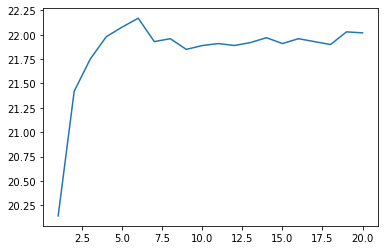

In [32]:
xs = range(1, 21)
ys = [read_score(f'94.{x}.score') for x in xs]
plt.plot(xs, ys)
plt.show()

## 95. サブワード化

In [51]:
!pip install sentencepiece

distutils: /opt/conda/include/python3.8/UNKNOWN
sysconfig: /opt/conda/include/python3.8
user = False
home = None
root = None
prefix = None
     |████████████████████████████████| 1.2 MB 6.1 MB/s eta 0:00:01
distutils: /opt/conda/include/python3.8/UNKNOWN
sysconfig: /opt/conda/include/python3.8
user = False
home = None
root = None
prefix = None


In [52]:
!pip install subword-nmt

distutils: /opt/conda/include/python3.8/UNKNOWN
sysconfig: /opt/conda/include/python3.8
user = False
home = None
root = None
prefix = None
distutils: /opt/conda/include/python3.8/UNKNOWN
sysconfig: /opt/conda/include/python3.8
user = False
home = None
root = None
prefix = None


In [53]:
import sentencepiece as spm
import re

In [54]:
spm.SentencePieceTrainer.Train('--input=kftt-data-1.0/data/orig/kyoto-train.ja --model_prefix=kyoto_ja --vocab_size=16000 --character_coverage=1.0')

In [55]:
sp = spm.SentencePieceProcessor()
sp.Load('kyoto_ja.model')

True

In [8]:
for src, dst in [
    ('kftt-data-1.0/data/orig/kyoto-train.ja', 'train.sub.ja'),
    ('kftt-data-1.0/data/orig/kyoto-dev.ja', 'dev.sub.ja'),
    ('kftt-data-1.0/data/orig/kyoto-test.ja', 'test.sub.ja'),
]:
    with open(src) as f, open(dst, 'w') as g:
        for x in f:
            x = x.strip()
            x = re.sub(r'\s+', ' ', x)
            x = sp.encode_as_pieces(x)
            x = ' '.join(x)
            print(x, file=g)

In [9]:
!head train.sub.ja

▁ 雪 舟 ( せ っ しゅう 、 14 20 年 ( 応永 27 年 )- 150 6 年 ( 永正 3 年 ) ) は 号 で 、 15 世紀後半 室町時代に 活躍した 水墨画 家 ・ 禅僧 で 、 画 聖 とも 称え られる 。
▁日本の 水墨画 を 一 変 させた 。
▁諱は 「 等 楊 ( とう よう ) 」 、 もしくは 「 拙 宗 ( せ っ しゅう ) 」 と号した 。
▁ 備中国 に 生まれ 、 京都 ・ 相国寺 に入って から 周防国 に移る 。
▁その後 遣 明 使 に 随行 して 中国 ( 明 ) に渡って 中国の 水墨画 を学んだ 。
▁ 作品 は 数多く 、 中国 風の 山 水 画 だけでなく 人物 画 や 花鳥 画 も よく した 。
▁大 胆 な 構図 と 力 強い 筆 線 は非常に 個 性 的な 画 風 を作り 出している 。
▁ 現存する 作品 のうち 6 点 が 国宝 に指定され ており 、 日本の 画家 のなかで も 別 格 の 評価 を受けている といえる 。
▁このため 、 花鳥 図屏風 などに 「 伝 雪 舟 筆 」 される 作品 は 大変 多い 。
▁ 真 筆 である か 専門 家 の間で も 意見 の 分かれ るもの も 多 々 ある 。


In [18]:
!subword-nmt learn-bpe -s 16000 < kftt-data-1.0/data/orig/kyoto-train.en > kyoto_en.codes

100%|####################################| 16000/16000 [01:01<00:00, 258.79it/s]


In [19]:
!subword-nmt apply-bpe -c kyoto_en.codes < kftt-data-1.0/data/orig/kyoto-train.en > train.sub.en
!subword-nmt apply-bpe -c kyoto_en.codes < kftt-data-1.0/data/orig/kyoto-dev.en > dev.sub.en
!subword-nmt apply-bpe -c kyoto_en.codes < kftt-data-1.0/data/orig/kyoto-test.en > test.sub.en

In [20]:
!head train.sub.en

K@@ n@@ own as Ses@@ shu (14@@ 20 - 150@@ 6@@ ), he was an ink painter and Zen monk active in the Muromachi period in the latter half of the 15th century, and was called a master pain@@ ter.
He revol@@ ut@@ ion@@ ized the Japanese ink paint@@ ing.
He was given the posthumous name "@@ Toyo@@ " or "S@@ es@@ shu (@@ 拙@@ 宗@@ )."
Born in Bicchu Province, he moved to Suo Province after entering S@@ Shokoku-ji Temple in Kyoto.
Later he accompanied a mission to Ming Dynasty China and learned Chinese ink paint@@ ing.
His works were man@@ y, including not only Chinese-style landscape paintings, but also portraits and pictures of flowers and bird@@ s.
His b@@ old compos@@ itions and strong brush st@@ rok@@ es const@@ ituted an extremely distinctive style.
6 of his ext@@ ant works are designated national treasu@@ res. In@@ de@@ ed, he is considered to be extraordinary among Japanese pain@@ ters.
For this reason, there are a great many art@@ works that are attributed to him, such as folding scre@@ 

In [17]:
!fairseq-preprocess -s ja -t en \
    --trainpref train.sub \
    --validpref dev.sub \
    --model-parallel-size 8 \
    --destdir data95  \
    --workers 30

2022-02-20 04:37:58 | INFO | fairseq_cli.preprocess | Namespace(align_suffix=None, alignfile=None, all_gather_list_size=16384, bf16=False, bpe=None, checkpoint_shard_count=1, checkpoint_suffix='', cpu=False, criterion='cross_entropy', dataset_impl='mmap', destdir='data95', empty_cache_freq=0, fp16=False, fp16_init_scale=128, fp16_no_flatten_grads=False, fp16_scale_tolerance=0.0, fp16_scale_window=None, joined_dictionary=False, log_format=None, log_interval=100, lr_scheduler='fixed', memory_efficient_bf16=False, memory_efficient_fp16=False, min_loss_scale=0.0001, model_parallel_size=8, no_progress_bar=False, nwordssrc=-1, nwordstgt=-1, only_source=False, optimizer=None, padding_factor=8, profile=False, quantization_config_path=None, scoring='bleu', seed=1, source_lang='ja', srcdict=None, target_lang='en', task='translation', tensorboard_logdir=None, testpref=None, tgtdict=None, threshold_loss_scale=None, thresholdsrc=0, thresholdtgt=0, tokenizer=None, tpu=False, trainpref='train.sub', u

In [27]:
!fairseq-train data95 \
    --memory-efficient-fp16 \
    --save-dir save95 \
    --max-epoch 10 \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 1e-3 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --update-freq 1 \
    --dropout 0.2 --weight-decay 0.0001 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 95.log

/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` mo

In [28]:
!fairseq-interactive --path save95/checkpoint10.pt data95 < test.sub.ja | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 95.out

In [5]:
def spacy_tokenize(src, dst):
    with open(src) as f, open(dst, 'w') as g:
        for x in f:
            x = x.strip()
            x = ' '.join([doc.text for doc in nlp(x)])
            print(x, file=g)

In [39]:
spacy_tokenize('95.out', '95.out.spacy')

In [46]:
!fairseq-score --sys 95.out.spacy --ref test.en

Namespace(ignore_case=False, order=4, ref='test.en', sacrebleu=False, sentence_bleu=False, sys='95.out.spacy')
BLEU4 = 18.95, 48.9/23.7/13.5/8.3 (BP=1.000, ratio=1.070, syslen=29576, reflen=27636)


In [47]:
%%bash
for N in `seq 1 10` ; do
    fairseq-interactive --path save95/checkpoint10.pt --beam $N data95 < test.sub.ja | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 95.$N.out
done

In [48]:
for i in range(1, 11):
    spacy_tokenize(f'95.{i}.out', f'95.{i}.out.spacy')

In [49]:
%%bash
for N in `seq 1 10` ; do
    fairseq-score --sys 95.$N.out.spacy --ref test.en > 95.$N.score
done

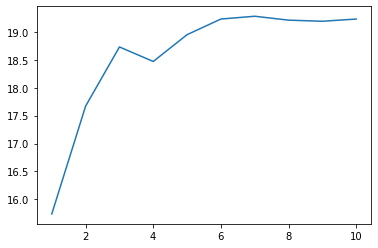

In [54]:
xs = range(1, 11)
ys = [read_score(f'95.{x}.score') for x in xs]
plt.plot(xs, ys)
plt.show()

## 96 学習過程の可視化

In [6]:
!pip install --upgrade tensorflow

distutils: /opt/conda/include/python3.8/UNKNOWN
sysconfig: /opt/conda/include/python3.8
user = False
home = None
root = None
prefix = None
     |███████████████████▋            | 304.7 MB 96.4 MB/s eta 0:00:03

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 497.6 MB 2.1 kB/s s eta 0:00:01
     |████████████████████████████████| 2.1 MB 64.3 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 80.7 MB/s eta 0:00:01
     |████████████████████████████████| 14.5 MB 34.6 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 37.4 MB/s eta 0:00:01
     |████████████████████████████████| 16.8 MB 69.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 61.1 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
  Attempting uninstall: tensorflow
    Fo

In [7]:
!pip install --upgrade tensorboard

distutils: /opt/conda/include/python3.8/UNKNOWN
sysconfig: /opt/conda/include/python3.8
user = False
home = None
root = None
prefix = None
distutils: /opt/conda/include/python3.8/UNKNOWN
sysconfig: /opt/conda/include/python3.8
user = False
home = None
root = None
prefix = None


In [8]:
!pip install tensorboard tensorboardX

distutils: /opt/conda/include/python3.8/UNKNOWN
sysconfig: /opt/conda/include/python3.8
user = False
home = None
root = None
prefix = None
     |████████████████████████████████| 124 kB 6.7 MB/s eta 0:00:01
distutils: /opt/conda/include/python3.8/UNKNOWN
sysconfig: /opt/conda/include/python3.8
user = False
home = None
root = None
prefix = None


In [16]:
!fairseq-train data95 \
    --fp16 \
    --tensorboard-logdir log96 \
    --save-dir save96 \
    --max-epoch 5 \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 1e-3 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --dropout 0.2 --weight-decay 0.0001 \
    --update-freq 1 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 96.log

/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` mo

In [9]:
%load_ext tensorboard

In [10]:
%tensorboard --logdir log96 --bind_all

http://localhost:6006/ でTensorflowの可視化を閲覧できる

## 97 ハイパー・パラメータの調整  
とりあえずドロップアウト率をいじってみる

In [27]:
!fairseq-train data95 \
    --fp16 \
    --save-dir save97_1 \
    --max-epoch 10 \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 1e-3 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --dropout 0.1 --weight-decay 0.0001 \
    --update-freq 1 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 97_1.log

/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` mo

In [28]:
!fairseq-train data95 \
    --fp16 \
    --save-dir save97_3 \
    --max-epoch 10 \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 1e-3 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --dropout 0.3 --weight-decay 0.0001 \
    --update-freq 1 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 97_3.log

/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` mo

In [29]:
!fairseq-train data95 \
    --fp16 \
    --save-dir save97_5 \
    --max-epoch 10 \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 1e-3 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --dropout 0.5 --weight-decay 0.0001 \
    --update-freq 1 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 97_5.log

/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` mo

In [30]:
!fairseq-interactive --path save97_1/checkpoint10.pt data95 < test.sub.ja | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 97_1.out
!fairseq-interactive --path save97_3/checkpoint10.pt data95 < test.sub.ja | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 97_3.out
!fairseq-interactive --path save97_5/checkpoint10.pt data95 < test.sub.ja | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 97_5.out

In [40]:
spacy_tokenize('97_1.out', '97_1.out.spacy')
spacy_tokenize('97_3.out', '97_3.out.spacy')
spacy_tokenize('97_5.out', '97_5.out.spacy')

In [41]:
!fairseq-score --sys 97_1.out.spacy --ref test.en
!fairseq-score --sys 97_3.out.spacy --ref test.en
!fairseq-score --sys 97_5.out.spacy --ref test.en

Namespace(ignore_case=False, order=4, ref='test.en', sacrebleu=False, sentence_bleu=False, sys='97_1.out.spacy')
BLEU4 = 19.97, 50.7/24.6/14.3/8.9 (BP=1.000, ratio=1.041, syslen=28782, reflen=27636)
Namespace(ignore_case=False, order=4, ref='test.en', sacrebleu=False, sentence_bleu=False, sys='97_3.out.spacy')
BLEU4 = 14.57, 41.0/18.3/10.1/6.0 (BP=1.000, ratio=1.159, syslen=32021, reflen=27636)
Namespace(ignore_case=False, order=4, ref='test.en', sacrebleu=False, sentence_bleu=False, sys='97_5.out.spacy')
BLEU4 = 4.13, 21.8/5.7/2.2/1.0 (BP=1.000, ratio=1.419, syslen=39210, reflen=27636)


### 学習率をいじる

In [89]:
!fairseq-train data95 \
    --fp16 \
    --save-dir save97a \
    --max-epoch 10 \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 5e-4 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --dropout 0.1 --weight-decay 0.0001 \
    --update-freq 1 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 97a.log

/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` mo

In [ ]:
!fairseq-interactive --path save97a/checkpoint10.pt data95 < test.sub.ja | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 97a.out

In [ ]:
spacy_tokenize('97a.out', '97a.out.spacy')

In [ ]:
!fairseq-score --sys 97a.out.spacy --ref test.en

In [90]:
!fairseq-train data95 \
    --fp16 \
    --save-dir save97b \
    --max-epoch 10 \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 2e-4 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --dropout 0.1 --weight-decay 0.0001 \
    --update-freq 1 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 97b.log

/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` mo

In [ ]:
!fairseq-interactive --path save97b/checkpoint10.pt data95 < test.sub.ja | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 97b.out

In [ ]:
spacy_tokenize('97b.out', '97b.out.spacy')

In [ ]:
!fairseq-score --sys 97b.out.spacy --ref test.en

In [91]:
!fairseq-train data95 \
    --fp16 \
    --save-dir save97c \
    --max-epoch 10 \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 1e-4 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --dropout 0.1 --weight-decay 0.0001 \
    --update-freq 1 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 97c.log

/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` mo

In [92]:
!fairseq-interactive --path save97c/checkpoint10.pt data95 < test.sub.ja | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 97c.out

Traceback (most recent call last):
  File "/opt/conda/bin/fairseq-interactive", line 8, in <module>
    sys.exit(cli_main())
  File "/opt/conda/lib/python3.8/site-packages/fairseq_cli/interactive.py", line 307, in cli_main
    distributed_utils.call_main(args, main)
  File "/opt/conda/lib/python3.8/site-packages/fairseq/distributed_utils.py", line 301, in call_main
    main(args, **kwargs)
  File "/opt/conda/lib/python3.8/site-packages/fairseq_cli/interactive.py", line 143, in main
    models, _model_args = checkpoint_utils.load_model_ensemble(
  File "/opt/conda/lib/python3.8/site-packages/fairseq/checkpoint_utils.py", line 250, in load_model_ensemble
    ensemble, args, _task = load_model_ensemble_and_task(
  File "/opt/conda/lib/python3.8/site-packages/fairseq/checkpoint_utils.py", line 278, in load_model_ensemble_and_task
    raise IOError("Model file not found: {}".format(filename))
OSError: Model file not found: save97b/checkpoint10.pt
Traceback (most recent call last):
  File "/

In [93]:
spacy_tokenize('97c.out', '97c.out.spacy')

In [94]:
!fairseq-score --sys 97c.out.spacy --ref test.en

Namespace(ignore_case=False, order=4, ref='test.en', sacrebleu=False, sentence_bleu=False, sys='97a.out.spacy')
BLEU4 = 17.94, 47.4/22.3/12.6/7.8 (BP=1.000, ratio=1.054, syslen=29116, reflen=27636)
Namespace(ignore_case=False, order=4, ref='test.en', sacrebleu=False, sentence_bleu=False, sys='97b.out.spacy')
Traceback (most recent call last):
  File "/opt/conda/bin/fairseq-score", line 8, in <module>
    sys.exit(cli_main())
  File "/opt/conda/lib/python3.8/site-packages/fairseq_cli/score.py", line 92, in cli_main
    score(f)
  File "/opt/conda/lib/python3.8/site-packages/fairseq_cli/score.py", line 86, in score
    print(scorer.result_string(args.order))
  File "/opt/conda/lib/python3.8/site-packages/fairseq/scoring/bleu.py", line 151, in result_string
    self.score(order=order),
  File "/opt/conda/lib/python3.8/site-packages/fairseq/scoring/bleu.py", line 125, in score
    return self.brevity() * math.exp(psum / order) * 100
  File "/opt/conda/lib/python3.8/site-packages/fairseq/sc

In [ ]:
!nvidia-smi

## 98 ドメイン適応

In [72]:
!wget http://www.kecl.ntt.co.jp/icl/lirg/jparacrawl/release/2.0/bitext/en-ja.tar.gz

--2022-02-20 14:55:46--  http://www.kecl.ntt.co.jp/icl/lirg/jparacrawl/release/2.0/bitext/en-ja.tar.gz
Resolving www.kecl.ntt.co.jp (www.kecl.ntt.co.jp)... 163.137.218.58
Connecting to www.kecl.ntt.co.jp (www.kecl.ntt.co.jp)|163.137.218.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1294917545 (1.2G) [application/x-gzip]
Saving to: ‘en-ja.tar.gz’

en-ja.tar.gz        100%[===================>]   1.21G  2.30MB/s    in 6m 38s  

2022-02-20 15:02:23 (3.10 MB/s) - ‘en-ja.tar.gz’ saved [1294917545/1294917545]



In [78]:
import tarfile

In [79]:
with tarfile.open('en-ja.tar.gz') as tar:
    for f in tar.getmembers():
        if f.name.endswith('txt'):
            text = tar.extractfile(f).read().decode('utf-8')
            break

In [80]:
data = text.splitlines()
data = [x.split('\t') for x in data]
data = [x for x in data if len(x) == 4]
data = [[x[3], x[2]] for x in data]

In [81]:
with open('jparacrawl.ja', 'w') as f, open('jparacrawl.en', 'w') as g:
    for j, e in data:
        print(j, file=f)
        print(e, file=g)

In [82]:
with open('jparacrawl.ja') as f, open('train.jparacrawl.ja', 'w') as g:
    for x in f:
        x = x.strip()
        x = re.sub(r'\s+', ' ', x)
        x = sp.encode_as_pieces(x)
        x = ' '.join(x)
        print(x, file=g)

In [83]:
!subword-nmt apply-bpe -c kyoto_en.codes < jparacrawl.en > train.jparacrawl.en

In [97]:
!fairseq-preprocess -s ja -t en \
    --trainpref train.jparacrawl \
    --validpref dev.sub \
    --model-parallel-size 8 \
    --destdir data98  \
    --workers 30

2022-02-21 13:02:48 | INFO | fairseq_cli.preprocess | Namespace(align_suffix=None, alignfile=None, all_gather_list_size=16384, bf16=False, bpe=None, checkpoint_shard_count=1, checkpoint_suffix='', cpu=False, criterion='cross_entropy', dataset_impl='mmap', destdir='data98', empty_cache_freq=0, fp16=False, fp16_init_scale=128, fp16_no_flatten_grads=False, fp16_scale_tolerance=0.0, fp16_scale_window=None, joined_dictionary=False, log_format=None, log_interval=100, lr_scheduler='fixed', memory_efficient_bf16=False, memory_efficient_fp16=False, min_loss_scale=0.0001, model_parallel_size=8, no_progress_bar=False, nwordssrc=-1, nwordstgt=-1, only_source=False, optimizer=None, padding_factor=8, profile=False, quantization_config_path=None, scoring='bleu', seed=1, source_lang='ja', srcdict=None, target_lang='en', task='translation', tensorboard_logdir=None, testpref=None, tgtdict=None, threshold_loss_scale=None, thresholdsrc=0, thresholdtgt=0, tokenizer=None, tpu=False, trainpref='train.jparacr

In [98]:
!fairseq-train data98 \
    --fp16 \
    --save-dir save98_1 \
    --max-epoch 3 \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 1e-4 --lr-scheduler inverse_sqrt --warmup-updates 4000 \
    --dropout 0.1 --weight-decay 0.0001 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 98_1.log

/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` mo

In [99]:
!fairseq-interactive --path save98_1/checkpoint3.pt data98 < test.sub.ja | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 98_1.out

In [100]:
spacy_tokenize('98_1.out', '98_1.out.spacy')

In [101]:
!fairseq-score --sys 98_1.out.spacy --ref test.en

Namespace(ignore_case=False, order=4, ref='test.en', sacrebleu=False, sentence_bleu=False, sys='98_1.out.spacy')
BLEU4 = 8.57, 41.4/13.8/5.7/2.6 (BP=0.895, ratio=0.900, syslen=24878, reflen=27636)


In [112]:
!fairseq-preprocess -s ja -t en \
    --trainpref train.sub \
    --validpref dev.sub \
    --tgtdict data98/dict.en.txt \
    --srcdict data98/dict.ja.txt \
    --model-parallel-size 8 \
    --destdir data98_2  \
    --workers 30

2022-02-21 17:46:04 | INFO | fairseq_cli.preprocess | Namespace(align_suffix=None, alignfile=None, all_gather_list_size=16384, bf16=False, bpe=None, checkpoint_shard_count=1, checkpoint_suffix='', cpu=False, criterion='cross_entropy', dataset_impl='mmap', destdir='data98_2', empty_cache_freq=0, fp16=False, fp16_init_scale=128, fp16_no_flatten_grads=False, fp16_scale_tolerance=0.0, fp16_scale_window=None, joined_dictionary=False, log_format=None, log_interval=100, lr_scheduler='fixed', memory_efficient_bf16=False, memory_efficient_fp16=False, min_loss_scale=0.0001, model_parallel_size=8, no_progress_bar=False, nwordssrc=-1, nwordstgt=-1, only_source=False, optimizer=None, padding_factor=8, profile=False, quantization_config_path=None, scoring='bleu', seed=1, source_lang='ja', srcdict='data98/dict.ja.txt', target_lang='en', task='translation', tensorboard_logdir=None, testpref=None, tgtdict='data98/dict.en.txt', threshold_loss_scale=None, thresholdsrc=0, thresholdtgt=0, tokenizer=None, t

In [113]:
!fairseq-train data98_2 \
    --fp16 \
    --restore-file save98_1/checkpoint3.pt \
    --save-dir save98_2 \
    --max-epoch 10 \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 1e-3 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --dropout 0.1 --weight-decay 0.0001 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 98_2.log

/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` module is deprecated. Please avoid using it.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/distributed.py:425: UserWarning: The `check_reduction` argument in `DistributedDataParallel` mo

In [114]:
!fairseq-interactive --path save98_2/checkpoint10.pt data98_2 < test.sub.ja | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 98_2.out

In [115]:
spacy_tokenize('98_2.out', '98_2.out.spacy')

In [116]:
!fairseq-score --sys 98_2.out.spacy --ref test.en

Namespace(ignore_case=False, order=4, ref='test.en', sacrebleu=False, sentence_bleu=False, sys='98_2.out.spacy')
BLEU4 = 22.27, 53.2/27.1/16.4/10.4 (BP=1.000, ratio=1.042, syslen=28802, reflen=27636)
